# Linear Regression — Normal Equation (From Scratch)

Goal:
- Understand the closed-form solution for linear regression
- Know exactly why it fails to scale
- See why Gradient Descent is necessary in practice


We want to find weights w that minimize:

J(w) = (1/m) ||Xw - y||²

Instead of iterating (Gradient Descent),
we directly solve for w using calculus.


Taking derivative of J(w) w.r.t w and setting to zero:

XᵀXw = Xᵀy

Solving:
w = (XᵀX)⁻¹ Xᵀ y

This assumes (XᵀX) is invertible.


In [1]:
import numpy as np

np.random.seed(42)

m = 100
X = np.random.randn(m, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(m) * 0.5

X_b = np.c_[np.ones((m, 1)), X]  # bias term


In [2]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

w = normal_equation(X_b, y)
w


array([2.00371391, 2.92837142])

This is NOT optimization.
This is solving a system of equations directly.


In [3]:
y_pred = X_b @ w

mse = np.mean((y - y_pred)**2)
mse


np.float64(0.22090812057282214)

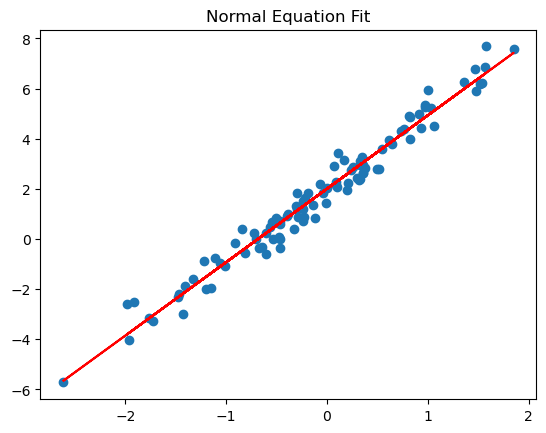

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title("Normal Equation Fit")
plt.show()


In [5]:
X_bad = np.c_[np.ones((m, 1)), X, 2*X]  # redundant feature

try:
    normal_equation(X_bad, y)
except np.linalg.LinAlgError as e:
    print("Failure:", e)


Failure: Singular matrix


One column is a linear combination of another.
XᵀX becomes singular → no inverse.


Normal Equation Complexity:
- Matrix multiplication: O(n²m)
- Matrix inversion: O(n³)

If n = number of features:
- n = 10 → OK
- n = 10,000 → impossible

Memory explosion + computation cost.


Normal Equation:
✔ Exact solution
✔ No hyperparameters
✖ Does not scale
✖ Fails with multicollinearity

This is why Gradient Descent exists.
